In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [2]:
plt.rcParams['figure.figsize'] = [20,10]

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
#df.head()

In [4]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.560000,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.717500,-112.477700,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.700000,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.266700,-77.510100,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.930000,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.939600,-105.818900,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.900000,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.352600,-102.541100,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.300000,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.843300,-113.874800,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [6]:
df.shape

(1296675, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.duplicated().sum()
# no duplicates

0

In [9]:
df.isnull().sum()
# no null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [11]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,648337.000000,417192042079641088.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789
std,374317.974488,1308806447000789248.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091,0.075863
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,324168.500000,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000
50%,648337.000000,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000
75%,972505.500000,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236796,0.000000
max,1296674.000000,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000


In [12]:
# drop unnamed:0
df.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
# dropping trans_num, all are unique.
df.drop(axis=1,columns=['trans_num'],inplace=True)

In [13]:
# Change data type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [15]:
# splitting date and time
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_dayofweek,trans_month,trans_year
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,1,Tuesday,1,2019
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,1,Tuesday,1,2019
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,0,1,Tuesday,1,2019
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,0,1,Tuesday,1,2019
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,0,1,Tuesday,1,2019


In [16]:
# extract age using transaction datetime and date of birth.
df['age'] = (df['trans_date_trans_time'] - df['dob']).astype('timedelta64[Y]')

In [17]:
df.drop(axis=1,columns=['dob'],inplace=True)

In [18]:
df.drop(axis=1,columns=['trans_date_trans_time'],inplace=True)

In [19]:
# combine first and last name column.
df['name']=df['first']+' '+df['last']
df.drop(axis=1,columns=['first','last'],inplace=True)

In [20]:
df.std()

cc_num        1308806447000789248.000000
amt                           160.316039
zip                         26893.222476
lat                             5.075808
long                           13.759077
city_pop                   301956.360689
unix_time                12841278.423360
merch_lat                       5.109788
merch_long                     13.771091
is_fraud                        0.075863
trans_hour                      6.817824
trans_day                       8.829121
trans_month                     3.417703
trans_year                      0.452245
age                            17.397305
dtype: float64

In [21]:
# As we can see that the variable 'trans_year' has a standard deviation of zero.
# it will not contribute to our model. So, we will drop the column 'trans_year'.

In [22]:
df.drop(axis=1,columns=['trans_year'],inplace=True)

In [23]:
# sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud.
# so taking the difference of longitude and lattitude of respective columns

df["lat_diff"] = abs(df.lat - df.merch_lat)
df["long_diff"] = abs(df["long"] - df["merch_long"])

In [24]:
# now since we have the difference, it is estimated that difference between each degree of longitude and lattitude is 69 miles(approx)
# or 110 kilometers (approx), so taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem
df["displacement"] = np.sqrt(pow((df["lat_diff"]*110),2) + pow((df["long_diff"]*110),2))

In [25]:
df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"], axis=1,inplace=True)

In [26]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
df.drop(columns = ["city","zip","street"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   cc_num           1296675 non-null  int64  
 1   merchant         1296675 non-null  object 
 2   category         1296675 non-null  object 
 3   amt              1296675 non-null  float64
 4   gender           1296675 non-null  object 
 5   state            1296675 non-null  object 
 6   city_pop         1296675 non-null  int64  
 7   job              1296675 non-null  object 
 8   unix_time        1296675 non-null  int64  
 9   is_fraud         1296675 non-null  int64  
 10  trans_hour       1296675 non-null  int64  
 11  trans_day        1296675 non-null  int64  
 12  trans_dayofweek  1296675 non-null  object 
 13  trans_month      1296675 non-null  int64  
 14  age              1296675 non-null  float64
 15  name             1296675 non-null  object 
 16  displacement     1

In [27]:
df.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,unix_time,is_fraud,trans_hour,trans_day,trans_dayofweek,trans_month,age,name,displacement
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,NC,3495,"Psychologist, counselling",1325376018,0,0,1,Tuesday,1,30.000000,Jennifer Banks,96.011245
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,WA,149,Special educational needs teacher,1325376044,0,0,1,Tuesday,1,40.000000,Stephanie Gill,29.954105
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,ID,4154,Nature conservation officer,1325376051,0,0,1,Tuesday,1,56.000000,Edward Sanchez,107.342986
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,MT,1939,Patent attorney,1325376076,0,0,1,Tuesday,1,51.000000,Jeremy White,101.178169
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,VA,99,Dance movement psychotherapist,1325376186,0,0,1,Tuesday,1,32.000000,Tyler Garcia,95.535506


In [28]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'city_pop',
       'job', 'unix_time', 'is_fraud', 'trans_hour', 'trans_day',
       'trans_dayofweek', 'trans_month', 'age', 'name', 'displacement'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   cc_num           1296675 non-null  int64  
 1   merchant         1296675 non-null  object 
 2   category         1296675 non-null  object 
 3   amt              1296675 non-null  float64
 4   gender           1296675 non-null  object 
 5   state            1296675 non-null  object 
 6   city_pop         1296675 non-null  int64  
 7   job              1296675 non-null  object 
 8   unix_time        1296675 non-null  int64  
 9   is_fraud         1296675 non-null  int64  
 10  trans_hour       1296675 non-null  int64  
 11  trans_day        1296675 non-null  int64  
 12  trans_dayofweek  1296675 non-null  object 
 13  trans_month      1296675 non-null  int64  
 14  age              1296675 non-null  float64
 15  name             1296675 non-null  object 
 16  displacement     1

In [30]:
df.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,unix_time,is_fraud,trans_hour,trans_day,trans_dayofweek,trans_month,age,name,displacement
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,NC,3495,"Psychologist, counselling",1325376018,0,0,1,Tuesday,1,30.000000,Jennifer Banks,96.011245
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,WA,149,Special educational needs teacher,1325376044,0,0,1,Tuesday,1,40.000000,Stephanie Gill,29.954105
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,ID,4154,Nature conservation officer,1325376051,0,0,1,Tuesday,1,56.000000,Edward Sanchez,107.342986
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,MT,1939,Patent attorney,1325376076,0,0,1,Tuesday,1,51.000000,Jeremy White,101.178169
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,VA,99,Dance movement psychotherapist,1325376186,0,0,1,Tuesday,1,32.000000,Tyler Garcia,95.535506


In [31]:
df.describe(include='object')

,merchant,category,gender,state,job,trans_dayofweek,name
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,51,494,7,973
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor,Monday,Scott Martin
freq,4403,131659,709863,94876,9779,254282,4618


In [32]:
df.describe()

,cc_num,amt,city_pop,unix_time,is_fraud,trans_hour,trans_day,trans_month,age,displacement
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,417192042079641088.000000,70.351035,88824.440563,1349243636.726123,0.005789,12.804858,15.587978,6.142150,45.497407,84.222718
std,1308806447000789248.000000,160.316039,301956.360689,12841278.423360,0.075863,6.817824,8.829121,3.417703,17.397305,31.322327
min,60416207185.000000,1.000000,23.000000,1325376018.000000,0.000000,0.000000,1.000000,1.000000,13.000000,0.026253
25%,180042946491150.000000,9.650000,743.000000,1338750742.500000,0.000000,7.000000,8.000000,3.000000,32.000000,62.145374
50%,3521417320836166.000000,47.520000,2456.000000,1349249747.000000,0.000000,14.000000,15.000000,6.000000,43.000000,87.814224
75%,4642255475285942.000000,83.140000,20328.000000,1359385375.500000,0.000000,19.000000,23.000000,9.000000,57.000000,107.528928
max,4992346398065154048.000000,28948.900000,2906700.000000,1371816817.000000,1.000000,23.000000,31.000000,12.000000,95.000000,155.470077


### Univariate analysis

Categorical columns

In [33]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['merchant', 'category', 'gender', 'state', 'job', 'trans_dayofweek',
       'name'],
      dtype='object')

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64
******************************************************************************************************************************



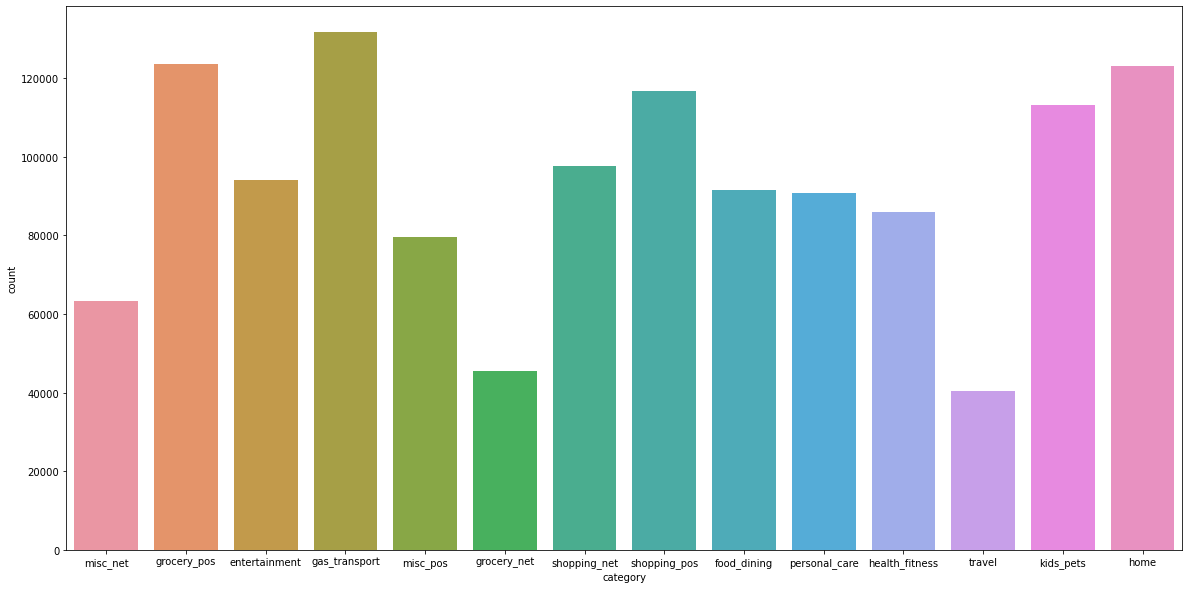

******************************************************************************************************************************



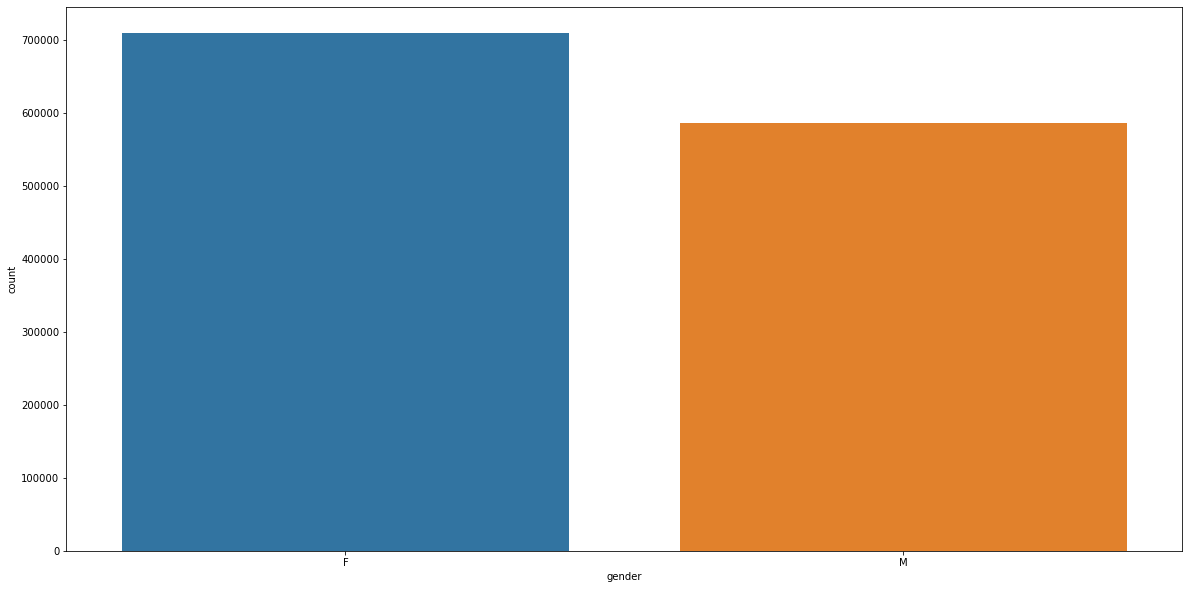

******************************************************************************************************************************



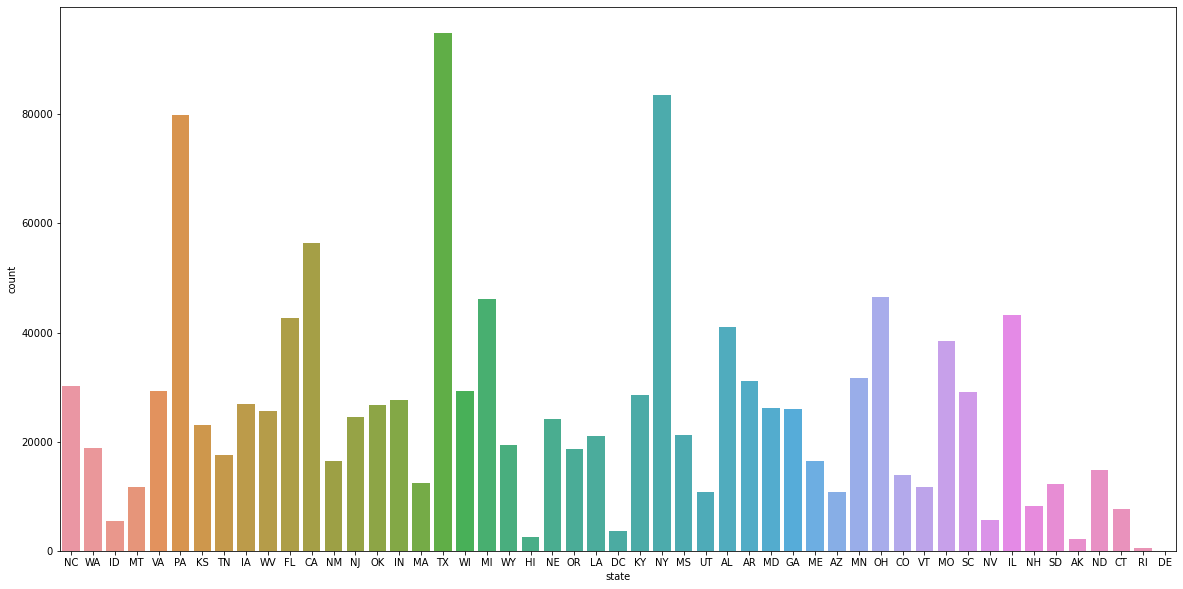

******************************************************************************************************************************

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64
******************************************************************************************************************************



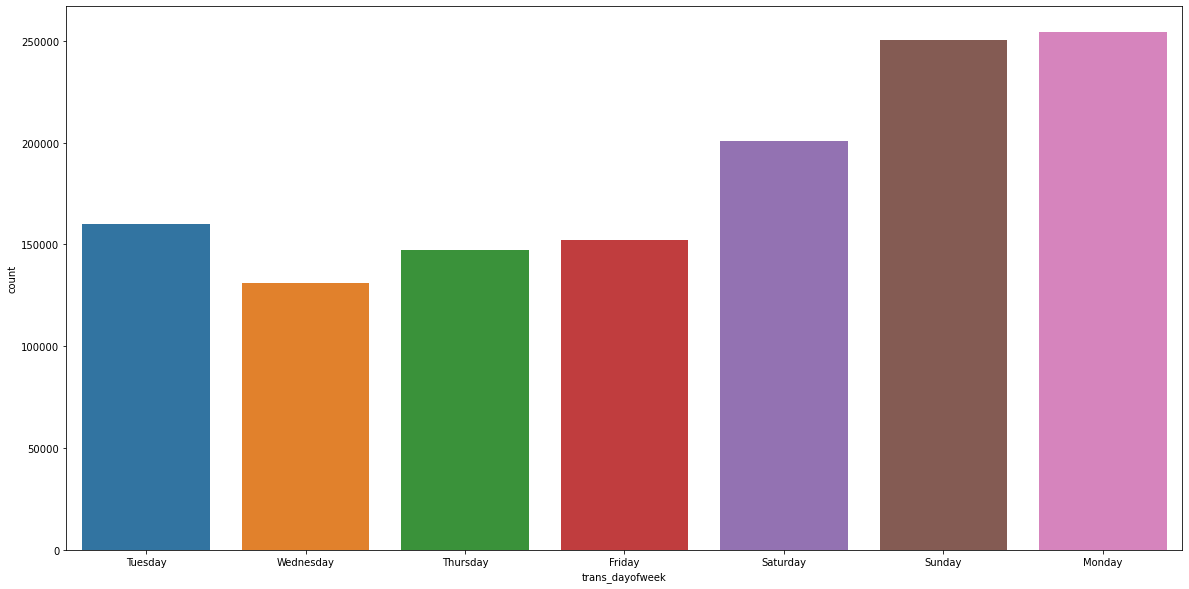

******************************************************************************************************************************

Scott Martin         4618
Jeffrey Smith        3592
Barbara Taylor       3123
Monica Cohen         3123
Jessica Perez        3119
                     ... 
Mark Pennington         7
Angelica Lopez          7
Kelly Lawrence          7
Cody Blake              7
Danielle Schaefer       7
Name: name, Length: 973, dtype: int64
******************************************************************************************************************************



<Figure size 1440x720 with 0 Axes>

In [34]:
for i in cat_cols:
    if df[i].nunique() > 60:
        print(df[i].value_counts())
    else:
        sns.countplot(df[i])
        plt.show()
    print('******************************************'*3,end='\n\n')
    plt.tight_layout()

In [35]:
# There are 693 merchants with 700 to 4.5k of transactions.
# grocery_pos, gas_transport, shopping_pos, kids_pets and home have over 100000 transactions.
# PA, TX, NY and CA with the big number of transactions.
# There are professions like Video editor, exhibit designer, architect and many more with over 5000 transactions. 
# Saturday, Sunday and Monday are the days with higher number of transactions.
# People ranges from 7 to 4618 transactions.

Numerical categories

In [36]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['cc_num', 'amt', 'city_pop', 'unix_time', 'is_fraud', 'trans_hour',
       'trans_day', 'trans_month', 'age', 'displacement'],
      dtype='object')

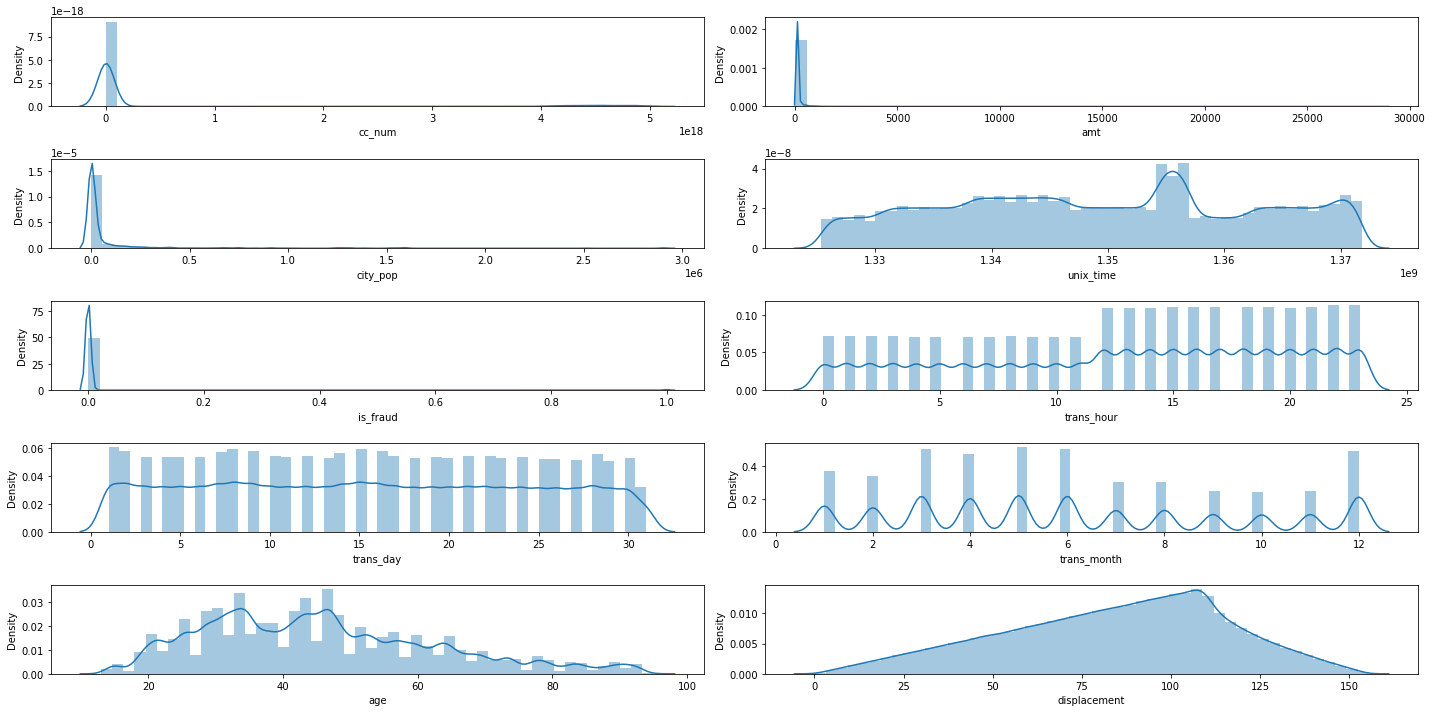

In [37]:
t=1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    t+=1
    plt.tight_layout()
plt.show()

In [38]:
# age looks a bit symmetrical.
# displacement is slightly negative skewed.
# city_pop and amt are highly positive skewed, strong possibilities of outliers.
# Days have almost equal number of transactions.
# After 12 pm there are more transactions.

### Outlier analysis



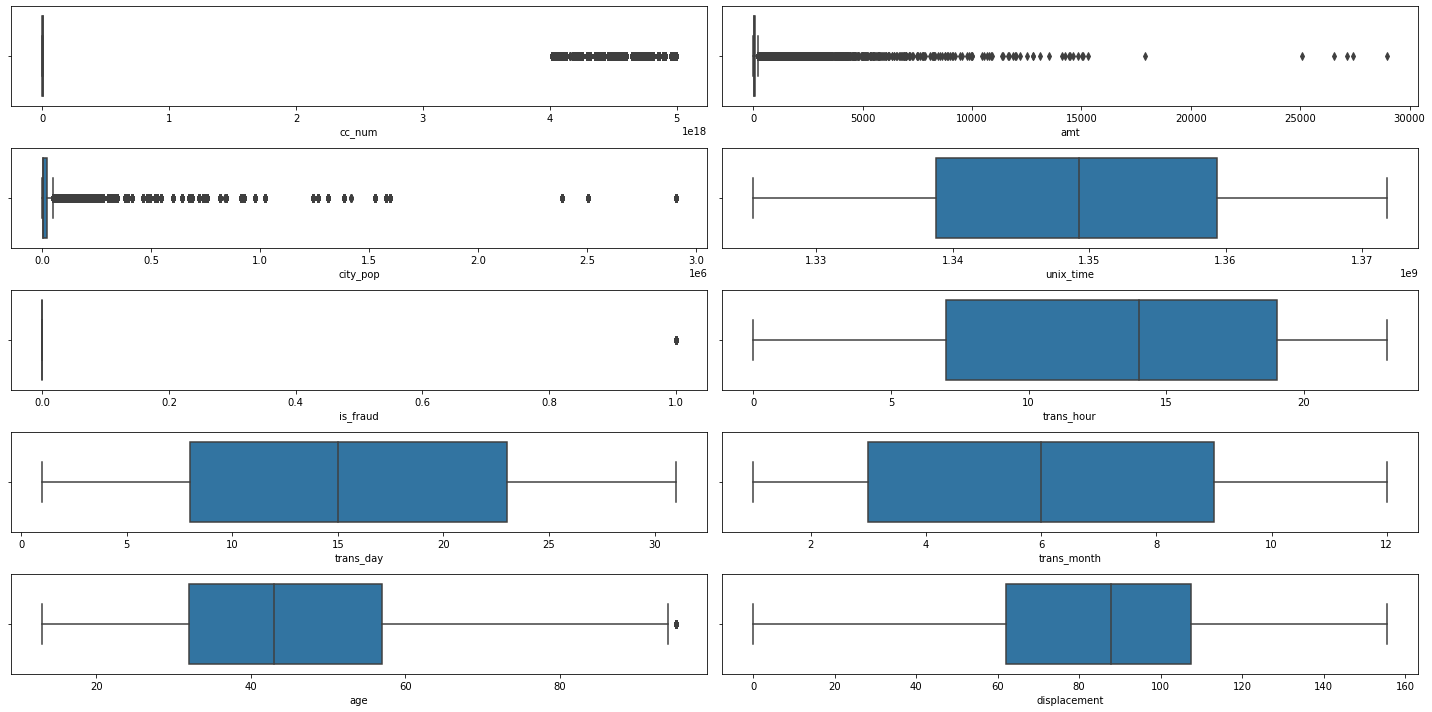

In [39]:
t=1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    t+=1
    plt.tight_layout()
plt.show()

### Distribution of Target variable

In [40]:
print(df['is_fraud'].value_counts(), end='\n\n')
print('Percentage wise distribution',df['is_fraud'].value_counts(normalize=True)*100, sep='\n')

0    1289169
1       7506
Name: is_fraud, dtype: int64

Percentage wise distribution
0   99.421135
1    0.578865
Name: is_fraud, dtype: float64


### Bivariate analysis

Categorical columns

is_fraud                             0   1
merchant                                  
fraud_Abbott-Rogahn               1841   3
fraud_Abbott-Steuber              1757   6
fraud_Abernathy and Sons          1747   4
fraud_Abshire PLC                 1886   9
fraud_Adams, Kovacek and Kuhlman   936   4
...                                ...  ..
fraud_Zemlak Group                1280  17
fraud_Zemlak, Tillman and Cremin  1802   2
fraud_Ziemann-Waters              1689   6
fraud_Zieme, Bode and Dooley      2552   8
fraud_Zulauf LLC                  1781   2

[693 rows x 2 columns]
******************************************************************************************************************************


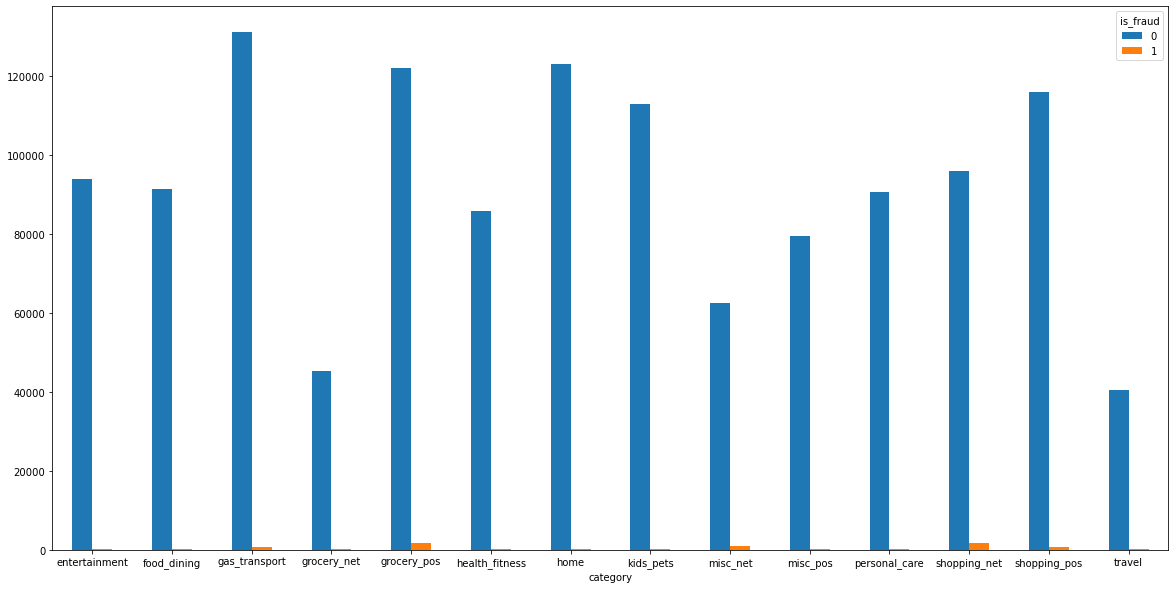

******************************************************************************************************************************


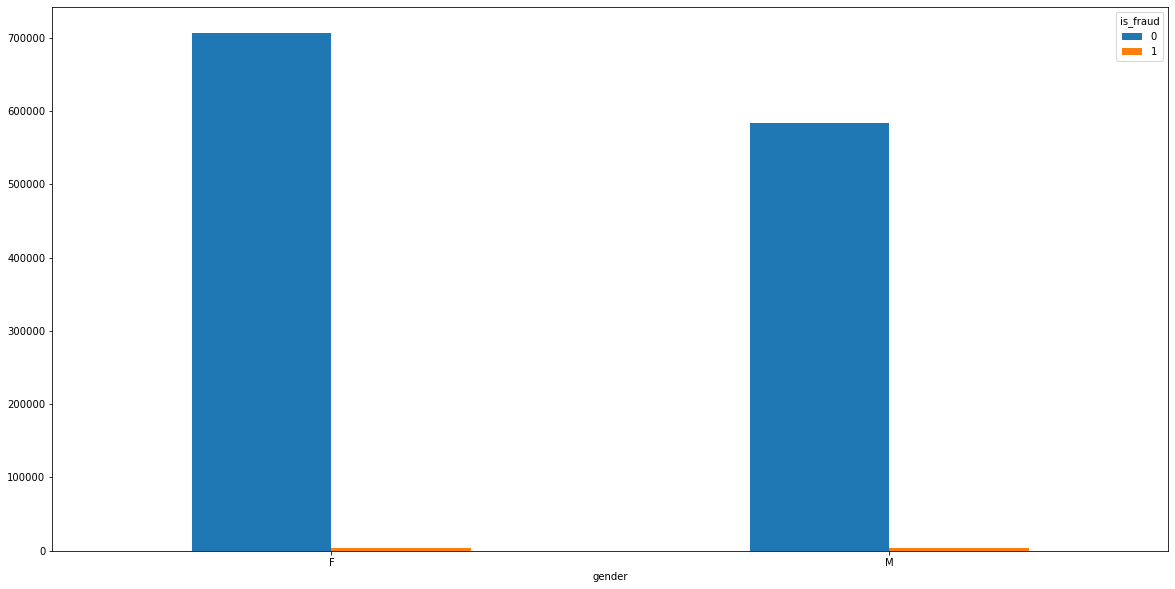

******************************************************************************************************************************


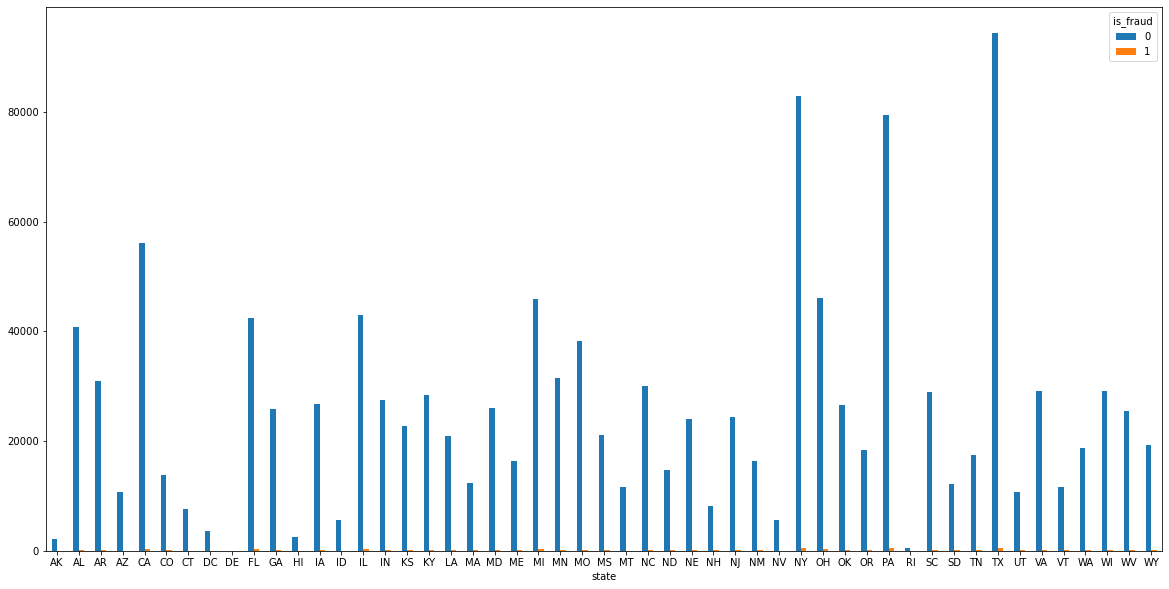

******************************************************************************************************************************
is_fraud                                 0   1
job                                           
Academic librarian                    1030  11
Accountant, chartered                    0  11
Accountant, chartered certified        525   9
Accountant, chartered public finance  2571   9
Accounting technician                 4640  33
...                                    ...  ..
Water engineer                        6164   0
Water quality scientist                503   7
Web designer                          2538  18
Wellsite geologist                    2581  20
Writer                                 489  15

[494 rows x 2 columns]
******************************************************************************************************************************


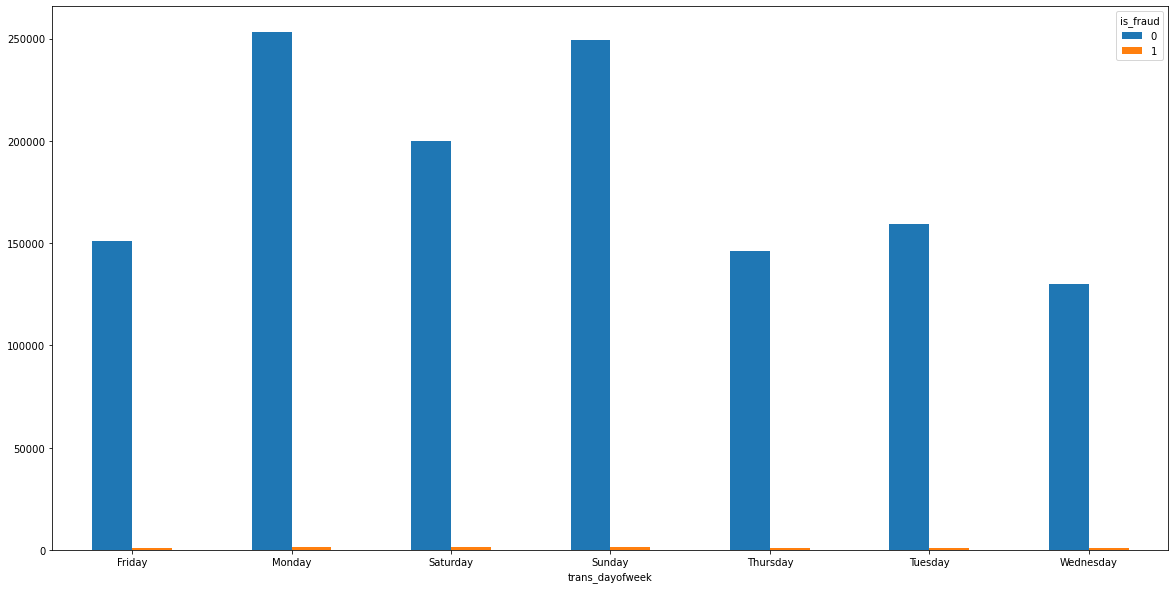

******************************************************************************************************************************
is_fraud             0   1
name                      
Aaron Murray      2042   8
Aaron Pena        1476   0
Aaron Rogers       496  12
Aaron Stewart      529   8
Adam Keller        507  14
...                ...  ..
William Thompson  2040  12
Willie Jordan     1034   4
Xavier Beltran    1503  13
Zachary Allen     1515   8
Zachary Boone      488   7

[973 rows x 2 columns]
******************************************************************************************************************************


In [42]:
for i in cat_cols:
    if df[i].nunique() > 60:
        print(pd.crosstab(df[i],df['is_fraud']))
    else:
        pd.crosstab(df[i],df['is_fraud']).plot(kind='bar')
        plt.xticks(rotation=0)
        plt.show()
    print('******************************************'*3,sep='\n\n')

In [ ]:
# State and category show some significant differences in between actual frauds.
# Gender and trans_dayofweek show no significant differences in between actual frauds.

Numerical categories

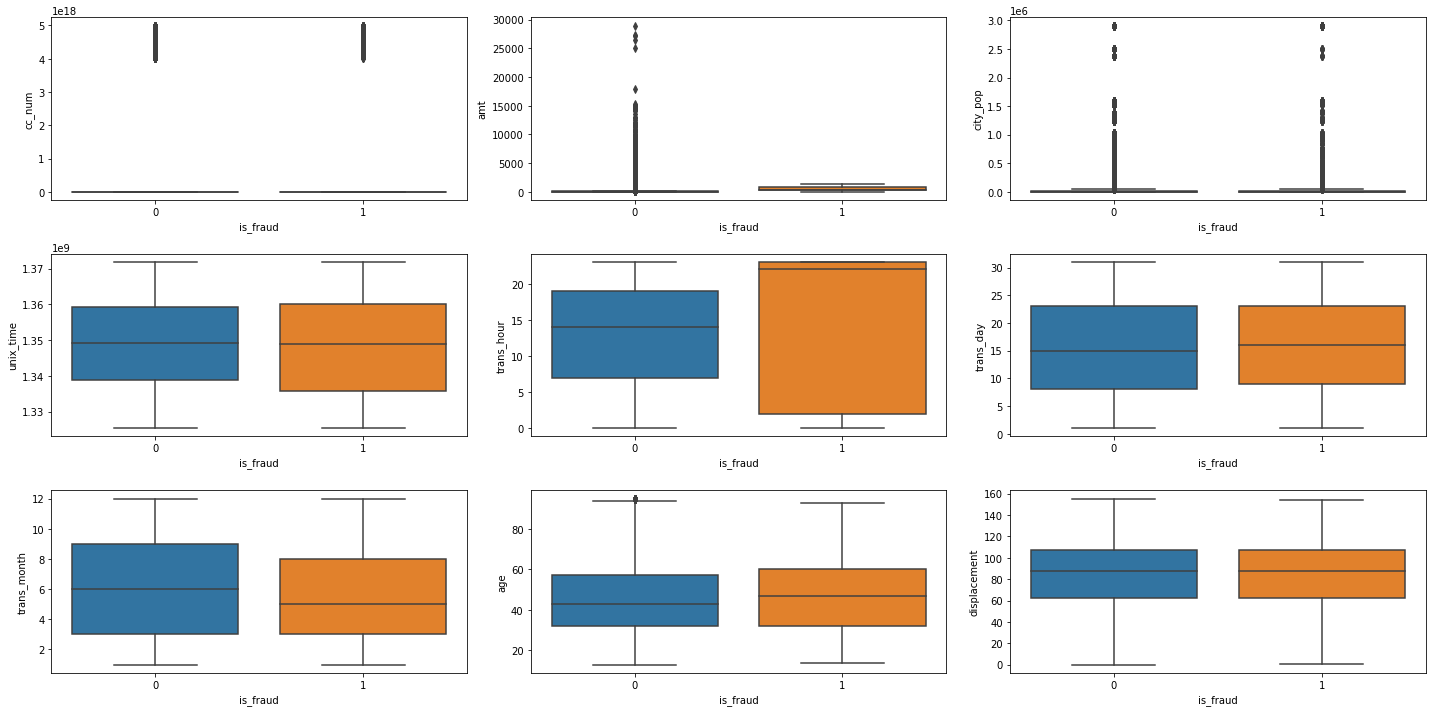

In [130]:
t=1
plt.figure(figsize=(20,10))
for i in df[num_cols].drop('is_fraud',axis=1).columns:
    plt.subplot(3,3,t)
    sns.boxplot(df['is_fraud'],df[i])
    t+=1
    plt.tight_layout()
plt.show()

In [ ]:
# We can see cc_num, city_pop, unix_time, trans_day, age and displacement are overlapping which means 
# there is no such significant differences.
# We should not consider these columns as these are insignificant for model building.
# Columns amt, trans_hour and trans_month shows the difference. 

### Probability and Statistics

Numerical columns

In [143]:
corrs, pvals = scipy.stats.spearmanr(df[['amt','trans_hour','trans_month','is_fraud']], axis=0)
print(corrs)

[[ 1.00000000e+00 -1.53934574e-01 -3.08055455e-03  8.79243576e-02]
 [-1.53934574e-01  1.00000000e+00 -6.83788971e-04  2.23865169e-02]
 [-3.08055455e-03 -6.83788971e-04  1.00000000e+00 -1.33922239e-02]
 [ 8.79243576e-02  2.23865169e-02 -1.33922239e-02  1.00000000e+00]]


<AxesSubplot:>

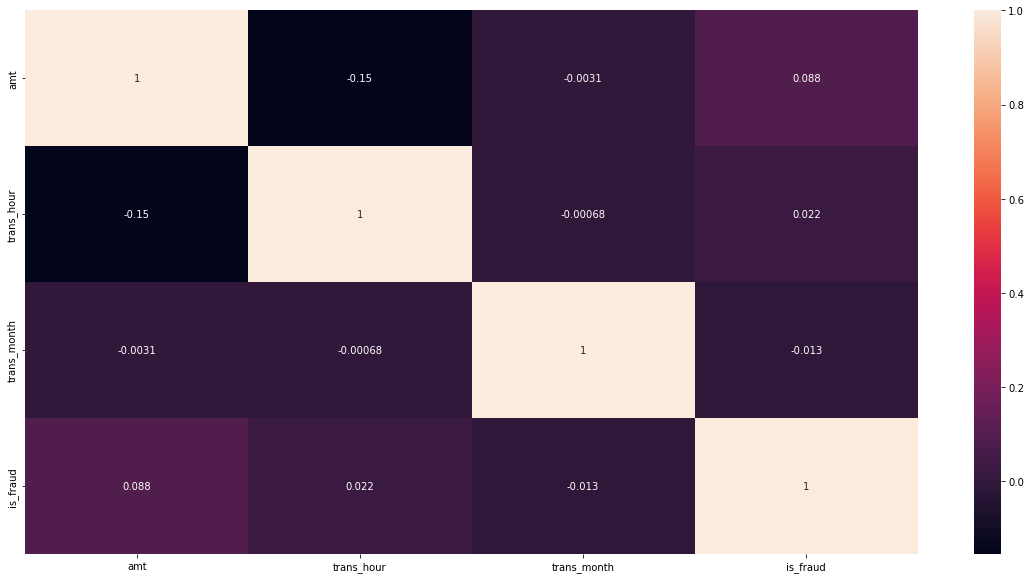

In [144]:
sns.heatmap(pd.DataFrame(corrs,index=['amt','trans_hour','trans_month','is_fraud'],columns=['amt','trans_hour','trans_month','is_fraud']),annot=True)

In [ ]:
# We can see the correlation values for numerical columns are closer to 0.
# No multicollinearity, Numerical columns are independent of each other.

Categorical columns

In [47]:
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pd.crosstab(df['gender'],df['category']))

if p_value <= 0.05:
    print("The columns are dependent.")
else:
    print("The columns are independent.")

The columns are dependent.


In [148]:
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pd.crosstab(df['category'],df['trans_dayofweek']))

if p_value <= 0.05:
    print("The columns are dependent.")
else:
    print("The columns are independent.")

The columns are dependent.


In [ ]:
# category and gender are dependent.
# category and trans_dayofweek are dependent.

### Creating copy of dataframe and dropping insignificant columns.

In [35]:
dfc=df.copy()

In [36]:
dfc.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'city_pop',
       'job', 'unix_time', 'is_fraud', 'trans_hour', 'trans_day',
       'trans_dayofweek', 'trans_month', 'age', 'name', 'displacement'],
      dtype='object')

In [37]:
# we drop insignificant columns we found from univariate, bivariate analysis and statistical testing.

In [38]:
# columns to be dropped.
drop_col=['cc_num', 'city_pop', 'unix_time', 'trans_day', 'age', 'displacement','merchant','gender','trans_dayofweek','name']

In [39]:
dfc.drop(columns=drop_col,axis=1,inplace=True)

In [40]:
dfc.columns

Index(['category', 'amt', 'state', 'job', 'is_fraud', 'trans_hour',
       'trans_month'],
      dtype='object')

In [41]:
dfc.head()

,category,amt,state,job,is_fraud,trans_hour,trans_month
0,misc_net,4.970000,NC,"Psychologist, counselling",0,0,1
1,grocery_pos,107.230000,WA,Special educational needs teacher,0,0,1
2,entertainment,220.110000,ID,Nature conservation officer,0,0,1
3,gas_transport,45.000000,MT,Patent attorney,0,0,1
4,misc_pos,41.960000,VA,Dance movement psychotherapist,0,0,1


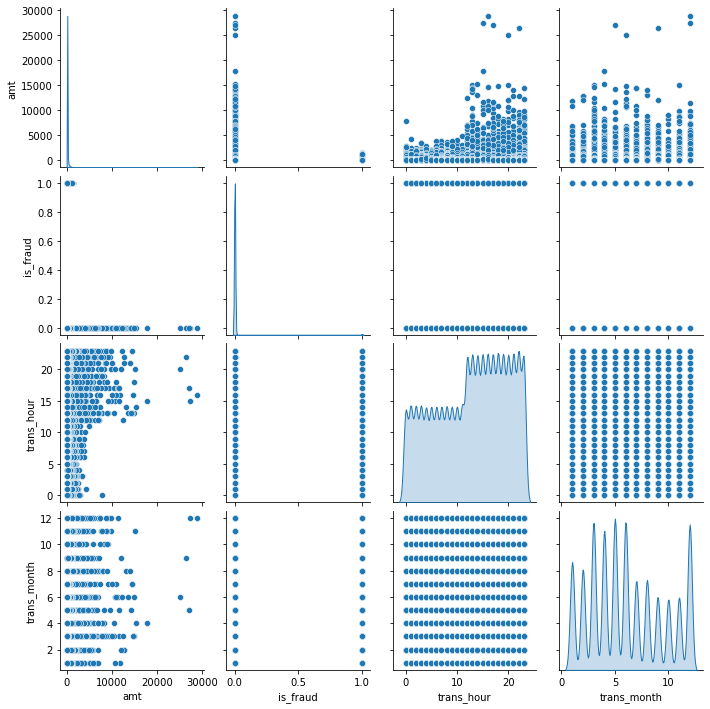

In [40]:
sns.pairplot(dfc,diag_kind='kde')

In [ ]:
# transaction of big amounts in the month of may, june, september and december.
# transaction of big amounts after 12pm.

In [41]:
dfc.dtypes

category        object
amt            float64
state           object
job             object
is_fraud         int64
trans_hour       int64
trans_month      int64
dtype: object

## Encoding

In [42]:
dfc.head()

,category,amt,state,job,is_fraud,trans_hour,trans_month
0,misc_net,4.970000,NC,"Psychologist, counselling",0,0,1
1,grocery_pos,107.230000,WA,Special educational needs teacher,0,0,1
2,entertainment,220.110000,ID,Nature conservation officer,0,0,1
3,gas_transport,45.000000,MT,Patent attorney,0,0,1
4,misc_pos,41.960000,VA,Dance movement psychotherapist,0,0,1


In [43]:
# Label encoding for category, state and job.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfc[['category_encoded','state_encoded','job_encoded']]= dfc[['category','state','job']].apply(le.fit_transform)

In [45]:
dfc.drop(columns=['category','state','job'],axis=1,inplace=True)

## Transformation

In [46]:
dfc['amt']=np.log(dfc['amt'])

<AxesSubplot:xlabel='amt', ylabel='Count'>

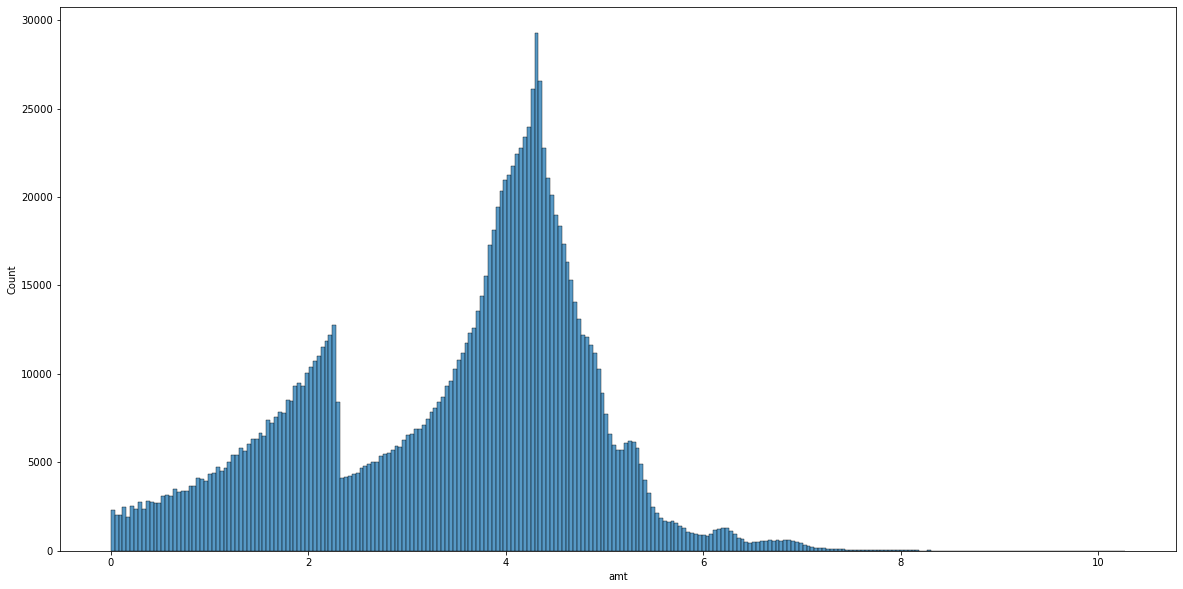

In [47]:
sns.histplot(dfc['amt'])

In [48]:
dfc.head()

,amt,is_fraud,trans_hour,trans_month,category_encoded,state_encoded,job_encoded
0,1.603420,0,0,1,8,27,370
1,4.674976,0,0,1,4,47,428
2,5.394127,0,0,1,0,13,307
3,3.806662,0,0,1,2,26,328
4,3.736717,0,0,1,9,45,116


In [49]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   amt               1296675 non-null  float64
 1   is_fraud          1296675 non-null  int64  
 2   trans_hour        1296675 non-null  int64  
 3   trans_month       1296675 non-null  int64  
 4   category_encoded  1296675 non-null  int32  
 5   state_encoded     1296675 non-null  int32  
 6   job_encoded       1296675 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 54.4 MB


VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dfc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfc.values, i)
                          for i in range(len(dfc.columns))]
  
vif_data.sort_values(by="VIF",ascending = False)

,feature,VIF
0,amt,4.799826
2,trans_hour,4.043914
5,state_encoded,3.971992
6,job_encoded,3.761576
3,trans_month,3.724108
4,category_encoded,3.236255
1,is_fraud,1.017997


In [51]:
# moderate correlation

Making dataset more balanced using undersampling

In [52]:
X=dfc.drop('is_fraud',axis=1)
y=dfc['is_fraud']

In [53]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.3,random_state=10)
X_under, y_under = undersample.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_under == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_under == 0)))

Before OverSampling, counts of label '1': 7506
Before OverSampling, counts of label '0': 1289169 

After OverSampling, the shape of train_X: (1296675, 6)
After OverSampling, the shape of train_y: (1296675,) 

After OverSampling, counts of label '1': 7506
After OverSampling, counts of label '0': 25020


Splitting dataset into train and test.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22768, 6)
y_train (22768,)
X_test (9758, 6)
y_test (9758,)


User defined functions

In [55]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return classification_report(y_train, train_pred)

def get_test_report(model):
    test_pred = model.predict(X_test)
    return classification_report(y_test, test_pred)

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Fraud Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

### Logistic Regression

In [56]:
reg = LogisticRegression()
reg_model=reg.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17528
           1       0.89      0.63      0.74      5240

    accuracy                           0.90     22768
   macro avg       0.90      0.81      0.84     22768
weighted avg       0.90      0.90      0.89     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7492
           1       0.90      0.61      0.73      2266

    accuracy                           0.89      9758
   macro avg       0.89      0.79      0.83      9758
weighted avg       0.89      0.89      0.89      9758




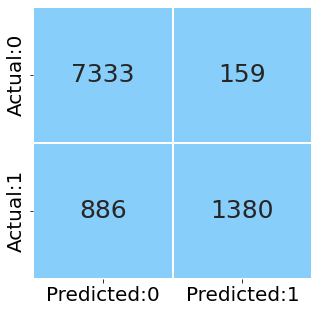

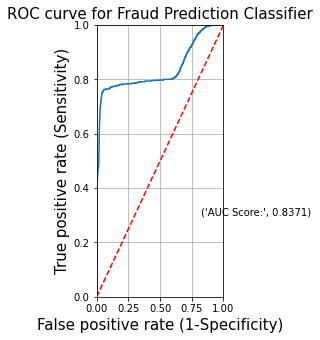

In [59]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(reg_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(reg_model), sep='\n', end='\n\n')
plt.subplot(1, 1 ,1)
plot_confusion_matrix(reg_model)
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plot_roc(reg_model)

## Naive Bayes

In [87]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17528
           1       0.90      0.63      0.74      5240

    accuracy                           0.90     22768
   macro avg       0.90      0.81      0.84     22768
weighted avg       0.90      0.90      0.89     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      7492
           1       0.90      0.62      0.73      2266

    accuracy                           0.90      9758
   macro avg       0.90      0.80      0.83      9758
weighted avg       0.90      0.90      0.89      9758




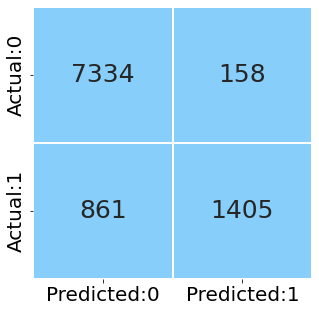

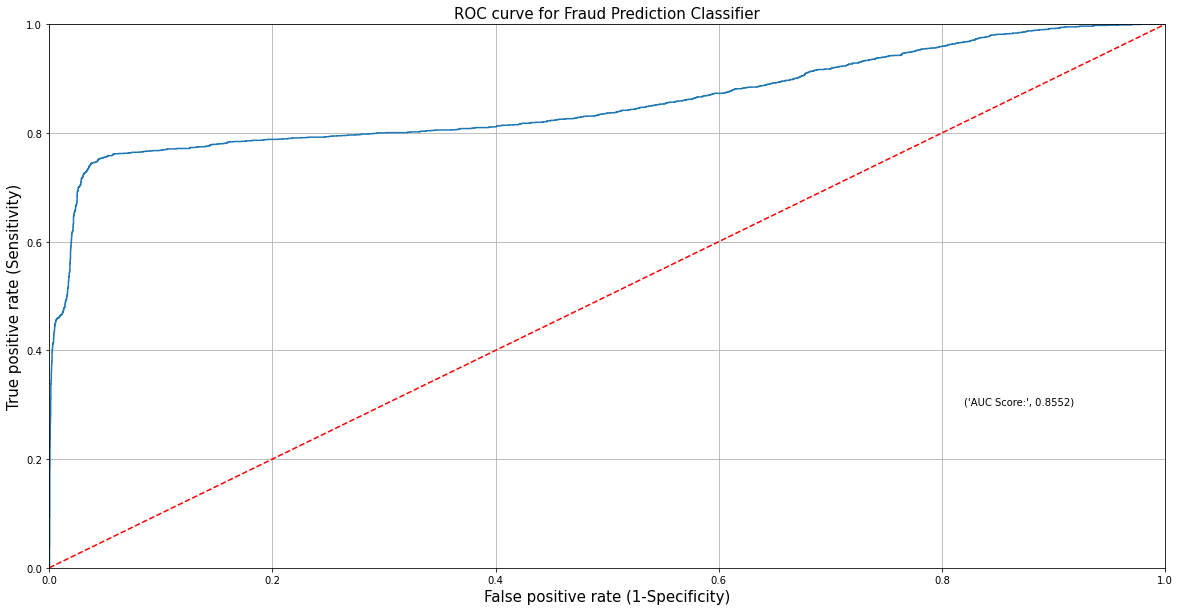

In [88]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(gnb_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(gnb_model), sep='\n', end='\n\n')
plot_confusion_matrix(gnb_model)
plot_roc(gnb_model)

In [89]:
# Naive Bayes model's performance is same as Logistic.

### Decision Tree

In [90]:
dt = DecisionTreeClassifier(random_state = 10)
dt_model = dt.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17528
           1       1.00      1.00      1.00      5240

    accuracy                           1.00     22768
   macro avg       1.00      1.00      1.00     22768
weighted avg       1.00      1.00      1.00     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7492
           1       0.92      0.94      0.93      2266

    accuracy                           0.97      9758
   macro avg       0.95      0.96      0.96      9758
weighted avg       0.97      0.97      0.97      9758




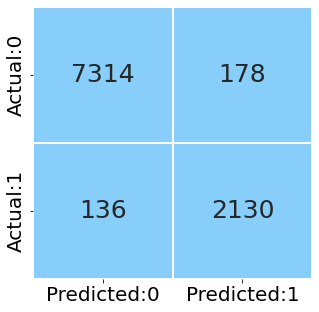

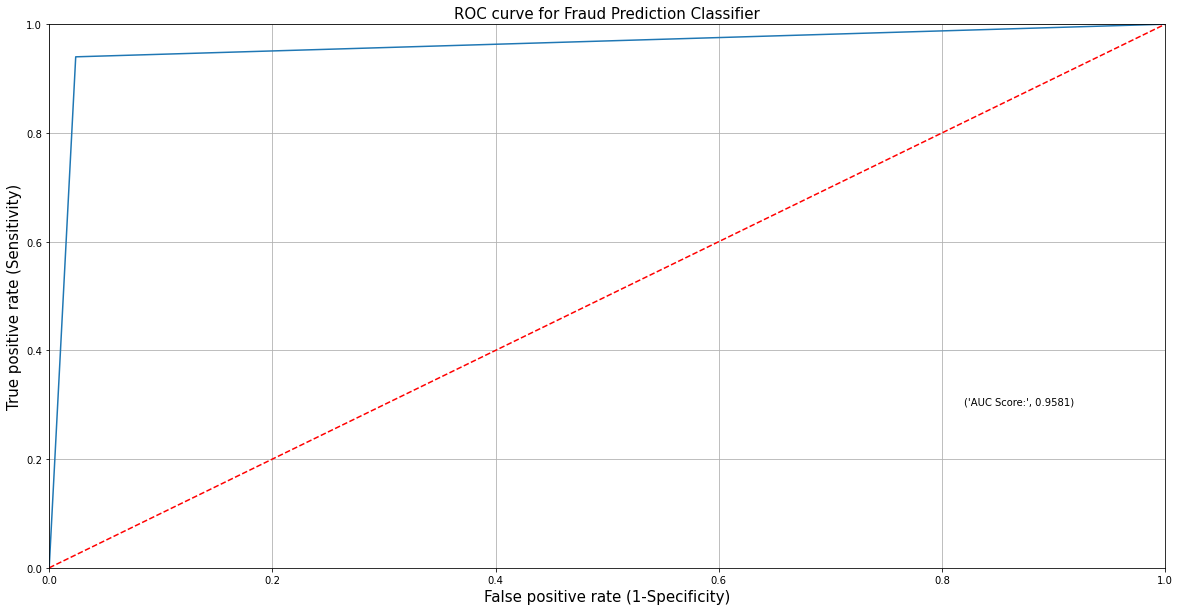

In [91]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(dt_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(dt_model), sep='\n', end='\n\n')
plot_confusion_matrix(dt_model)
plot_roc(dt_model)

In [92]:
# decision tree is overfit in training.

In [93]:
# Hyperparameter tuning to find the optimal values for parameters.
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = RandomizedSearchCV(estimator = decision_tree_classification, 
                         param_distributions= tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'entropy'} 



In [94]:
# Building model again using optimal parameters.
dthp = DecisionTreeClassifier(criterion='gini', max_depth=9, max_features='log2', max_leaf_nodes=7, 
                              min_samples_leaf=8, min_samples_split=5,random_state = 10)
dthp_model = dthp.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17528
           1       0.88      0.89      0.88      5240

    accuracy                           0.95     22768
   macro avg       0.92      0.93      0.92     22768
weighted avg       0.95      0.95      0.95     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7492
           1       0.88      0.88      0.88      2266

    accuracy                           0.95      9758
   macro avg       0.92      0.92      0.92      9758
weighted avg       0.95      0.95      0.95      9758




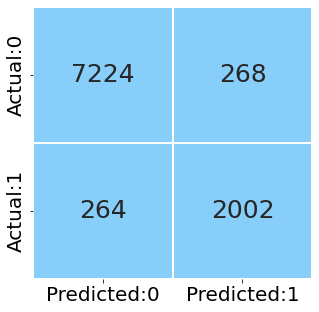

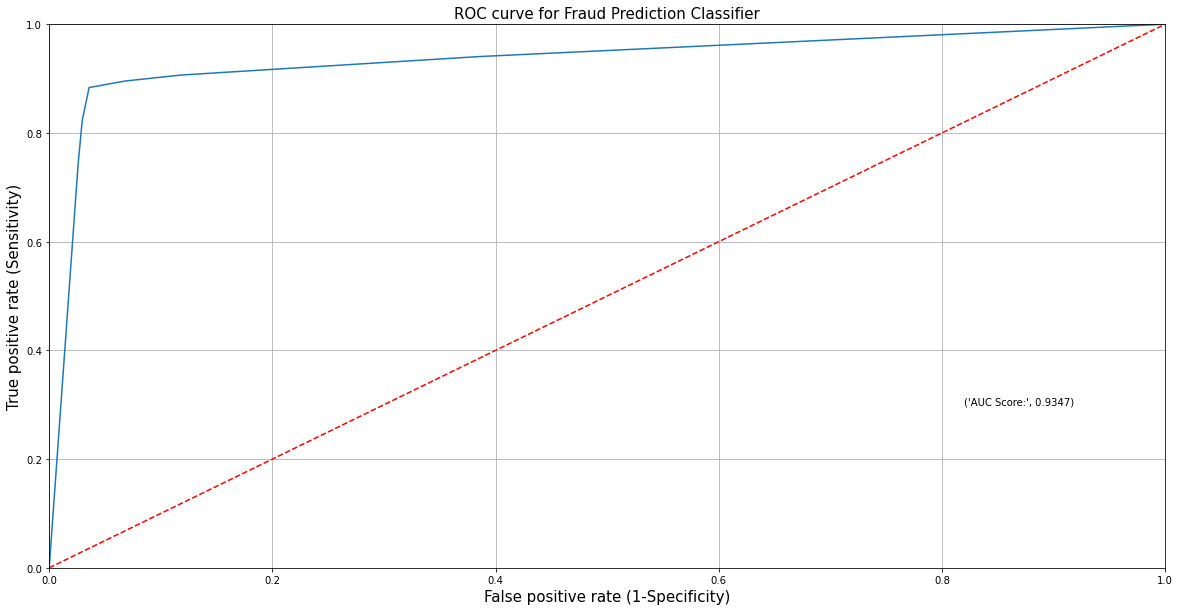

In [95]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(dthp_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(dthp_model), sep='\n', end='\n\n')
plot_confusion_matrix(dthp_model)
plot_roc(dthp_model)

In [96]:
# model has performed well in training as well as in testing.

### Random Forest

In [97]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17528
           1       1.00      0.99      0.99      5240

    accuracy                           1.00     22768
   macro avg       1.00      1.00      1.00     22768
weighted avg       1.00      1.00      1.00     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7492
           1       0.96      0.92      0.94      2266

    accuracy                           0.97      9758
   macro avg       0.97      0.95      0.96      9758
weighted avg       0.97      0.97      0.97      9758




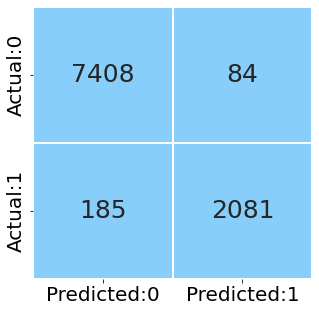

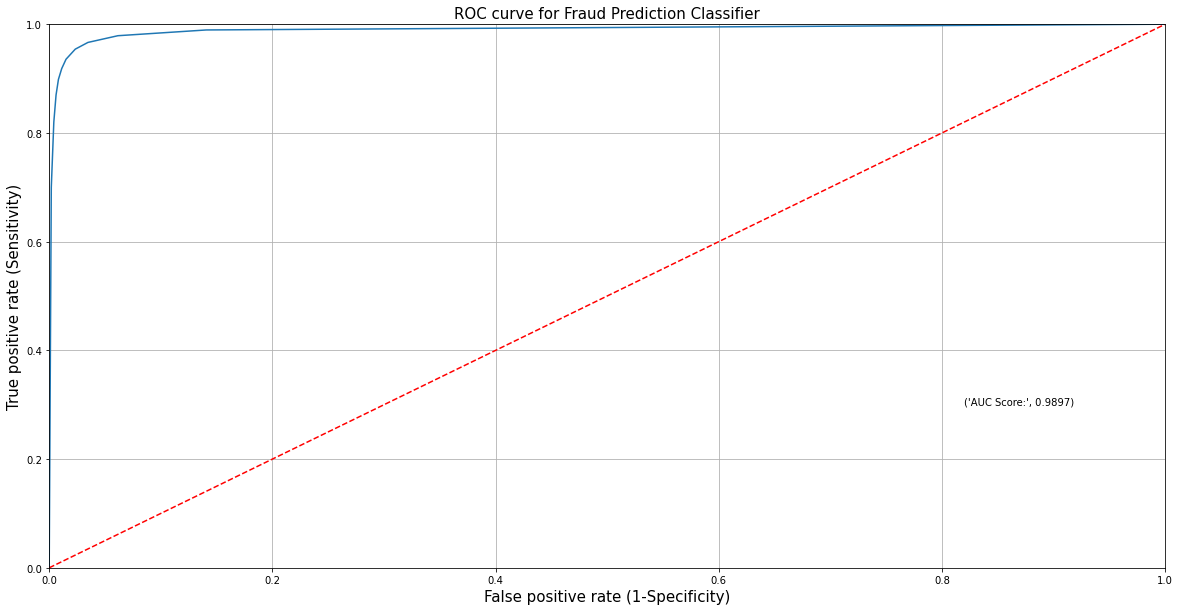

In [98]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(rf_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(rf_model), sep='\n', end='\n\n')
plot_confusion_matrix(rf_model)
plot_roc(rf_model)

In [99]:
# Model is overfit in training.

In [100]:
# Hyperparameter tuning to find the optimal values for parameters. 
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = RandomizedSearchCV(estimator = random_forest_classification, 
                       param_distributions = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 11, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'} 



In [101]:
# Building model again using optimal parameters.
rfhp = RandomForestClassifier(n_estimators = 30, min_samples_split=5, min_samples_leaf=1, max_leaf_nodes=11,
                            max_features='sqrt', max_depth= 20, criterion='gini', random_state = 10)
rfhp_model = rfhp.fit(X_train, y_train)

Performance in training------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17528
           1       0.96      0.82      0.88      5240

    accuracy                           0.95     22768
   macro avg       0.95      0.90      0.93     22768
weighted avg       0.95      0.95      0.95     22768


Performance in testing-------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7492
           1       0.96      0.81      0.88      2266

    accuracy                           0.95      9758
   macro avg       0.95      0.90      0.92      9758
weighted avg       0.95      0.95      0.95      9758




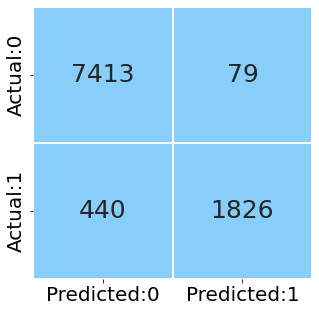

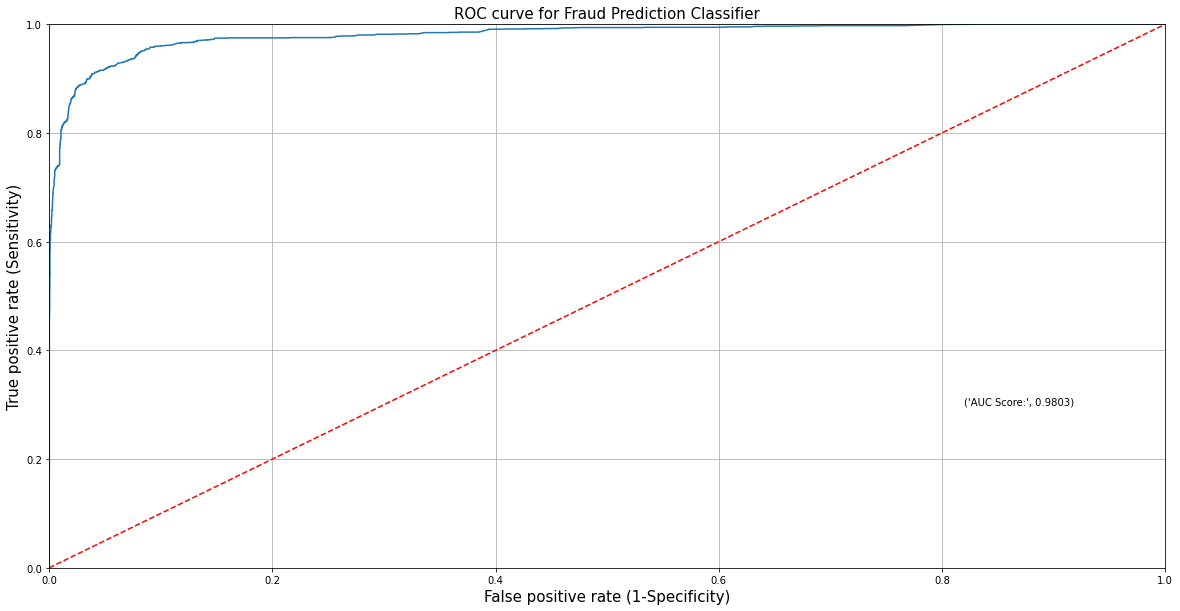

In [102]:
plt.figure(figsize=(5,5))
print('Performance in training------------------------------', get_train_report(rfhp_model), sep='\n', end='\n\n')
print('Performance in testing-------------------------------', get_test_report(rfhp_model), sep='\n', end='\n\n')
plot_confusion_matrix(rfhp_model)
plot_roc(rfhp_model)

In [ ]:
# Model is performing well in training as well as in testing.